# Spring 3: Tarea M3 T01

**Ejercicios de programación numérica.**

In [2]:
import numpy as np
from numpy import random

## Ejercicio 1

Crea una función que dado un Array de una dimensión, te haga un resumen estadístico básico de los datos. Si detecta que el array tiene más de una dimensión, debe mostrar un mensaje de error.

In [68]:
def statis_eval(v):
    if v.ndim > 1:
        print("Error. El array es de una dimensión")
    else:       
        print(f"El valor de la media es {v.mean()}")
        print(f"El valor de la mediana es {np.median(v)}")
        print(f"El valor de la desviación estandar {np.std(v)}")
        print(f"El valor de la varianza es {v.var()}")
        print(f"El valor máximo es {v.max()}")
        print(f"El valor mínimo es {v.min()}")
        print(f"El primer cuartil es {np.percentile(v, 25)}")
        print(f"El segundo cuartil es {np.percentile(v, 50)}")
        print(f"El tercer cuartil es {np.percentile(v, 75)}")

In [69]:
v = np.array([6,4,5,6,14,43,2,35,78,9,4,7,87])

statis_eval(v)

El valor de la media es 23.076923076923077
El valor de la mediana es 7.0
El valor de la desviación estandar 28.097252913795238
El valor de la varianza es 789.4556213017751
El valor máximo es 87
El valor mínimo es 2
El primer cuartil es 5.0
El segundo cuartil es 7.0
El tercer cuartil es 35.0


## Ejercicio 2

Crea una función que genere un cuadrado NxN de números aleatorios entre el 0 y el 100.

In [5]:
def matriz_cuadrada(x):
    z = random.randint(101, size=(x, x))
    print (z)    

In [6]:
print ("Introduce el número para crear una matriz cuadrada, por favor: ")
x = int(input())

print("La matriz cuadrada del número indicado es:")
matriz_cuadrada(x)

Introduce el número para crear una matriz cuadrada, por favor: 
4
La matriz cuadrada del número indicado es:
[[11 70 76 57]
 [47 55 87 35]
 [70 86 38 42]
 [52 70 83 50]]


## Ejercicio 3

Crea una función que dada una tabla de dos dimensiones (NxM), te calcule los totales por fila y los totales por columna.

In [70]:
def crea_matriz(n,m):
    z = random.randint(50, size=(n, m))
    return z

In [71]:
def total_columnas(n,m):
    Sum_Columnas = np.sum(crea_matriz(n,m), axis=0)
    mensaje = f"Los totales de las columnas son {Sum_Columnas}" 
    return mensaje

In [72]:
def total_filas(n,m):
    Sum_filas = np.sum(crea_matriz(n,m), axis=1)
    mensaje = f"Los totales de las filas son {Sum_filas}" 
    return mensaje

In [74]:
print ("Introduce un número (n) para crear una matriz, por favor: ")
n = int(input())
print ("Introduce un número (m) para crear una matriz, por favor: ")
m = int(input())

print (crea_matriz(n,m))
print (total_columnas(n,m))
print (total_filas(n,m))

Introduce un número (n) para crear una matriz, por favor: 
4
Introduce un número (m) para crear una matriz, por favor: 
3
[[25 42 25]
 [12 36 15]
 [ 0 46 26]
 [11 24 15]]
Los totales de las columnas son [109 130 133]
Los totales de las filas son [53 39 79 44]


## Ejercicio 4

Implementa manualmente una función que calcule el coeficiente de correlación. Infórmate sobre sus usos e interpretación. La formula a implementar seria la siguiente:

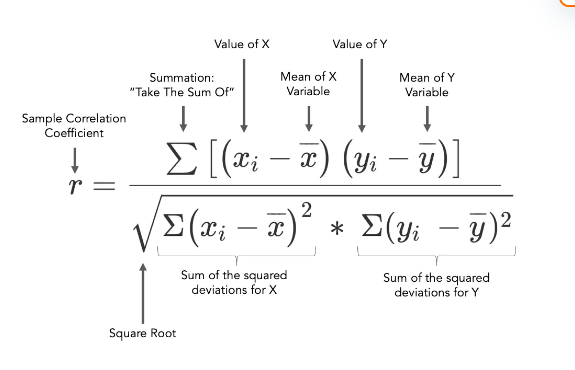

In [75]:
def calculo_coef_corr (var1,var2):
    if (len(var1) != len(var2)) & (var1.ndim & var2.ndim > 1):
        print('Los vectores deben tener la misma dimensión y ser de una dimensión')
    else: 
    #calcula la media de los dos array unidimensionales
        media_var1 = np.mean (var1)
        media_var2= np.mean (var2)
    
    #Calcula la diferencia de cada dato puntual respecto a su media, creando nuevos arrays
        var1_i = np.subtract (var1, media_var1)
        var2_i = np.subtract (var2,media_var2)
    
    #Calcula el producto entre las dos array, punto a punto, generando una nueva array
        prod_var1i_var2i = np.multiply (var1_i ,  var2_i)
    
    #Calcula la suma total.
        suma_total = np.sum (prod_var1i_var2i)
    
    #Calcula la desviacion estandar de cada array
        desv_std_var1 = np.std (var1)
        desv_std_var2 = np.std (var2)
    
    #Calculo del coeficiente de correlación
        coef_corr = (suma_total/len(prod_var1i_var2i)) / (desv_std_var1*desv_std_var2)

    return coef_corr

In [76]:
var1 = np.array([1.25, 1.28, 1.27, 1.21, 1.22])
var2 = np.array([32, 33, 34, 30, 32])

print(f"El coeficiente de correlacion es {calculo_coef_corr (var1,var2)}")

El coeficiente de correlacion es 0.85115354994936


In [77]:
def mean_vector(var): #calcula la media de array unidimensionales
    sum = 0
    for x in  var:
        sum = sum + x
    mean = sum/len(var)
    return mean

In [78]:
def substract_vector (var): #Calcula la diferencia de cada dato puntual respecto a su media, creando un nuevos array o vector
    subst_i = np.subtract (var, mean_vector(var))
    return subst_i

In [79]:
def prod_2vectores (var1,var2): #Calcula el producto entre las dos array, punto a punto, generando una nueva array
    prod_i = np.multiply (substract_vector (var1) ,  substract_vector (var2))
    return prod_i

In [80]:
def sum_sqr_vector(var): #Calcula la suma cuadrada de la diferencia entre cada elemento del vector y la media
    sqr = 0
    diff = substract_vector (var)
    for i in diff:
        sqr = sqr + i**2
    return sqr

In [81]:
import math

def calculo_coef_corr2 (var1,var2):
    if (len(var1) != len(var2)) & (var1.ndim & var2.ndim > 1):
        print('Los vectores deben tener la misma dimensión y ser de una dimensión')
    else:  #Calculo del coeficiente de correlación
        prod_sqr = np.multiply (sum_sqr_vector (var1) ,  sum_sqr_vector (var2))
        coef_corr = np.sum (prod_2vectores (var1,var2)) / (math.sqrt(prod_sqr))
    return coef_corr

In [82]:
var1 = np.array([1.25, 1.28, 1.27, 1.21, 1.22])
var2 = np.array([32, 33, 34, 30, 32])

print (f"El coeficiente de correlacion es {calculo_coef_corr2 (var1,var2)}")

El coeficiente de correlacion es 0.8511535499493601


In [83]:
coeficente = np.corrcoef(var1, var2)
coeficente

array([[1.        , 0.85115355],
       [0.85115355, 1.        ]])